## Model Training

In [1]:
#All tools and imports
import tensorflow as tf
import datetime
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

In [2]:
#import CSV data file
bird_data = pd.read_csv(r'.\capstone_data\capstonebirds.csv', index_col=0)

#Array of unique labels
labels = list(bird_data["labels"].unique())
labels

['BALD EAGLE', 'GOLDEN EAGLE', 'RED TAILED HAWK']

In [3]:
#Constants
classes=labels #All classes/labels
batch_size=32 #Batch size is 132 since we are working with a small amount of images
target_size=(224, 224) #All images will be resized to 224 x 224

In [4]:
#Directory of all training, validation and testing images
bird_train_directory = r'.\capstone_data\train'
bird_valid_directory = r'.\capstone_data\valid'
bird_test_directory = r'.\capstone_data\test'

In [5]:
#Preprocessing training, validation and testing images

#ImageDataGenerator
bird_image_datagen = ImageDataGenerator(dtype = 'float32', 
                                        preprocessing_function=preprocess_input)
    
#Flow training images in batches using the generator
train_generator = bird_image_datagen.flow_from_directory(
        bird_train_directory,  #This is the source directory for training images
        target_size=target_size,
        batch_size=batch_size,
        shuffle=True,
        #Specify the classes explicitly
        classes = classes,
        #Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')
    
#Flow validation images in batches using the generator
validation_generator = bird_image_datagen.flow_from_directory(
        bird_valid_directory,  #This is the source directory for validation images
        target_size=target_size,
        batch_size=batch_size,
        shuffle=True,
        #Specify the classes explicitly
        classes = classes,
        #Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow testing images in batches using the generator
test_generator = bird_image_datagen.flow_from_directory(
        bird_test_directory,  #This is the source directory for testing images
        target_size=target_size,
        batch_size=batch_size,
        #Specify the classes explicitly
        classes=classes,
        #Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 524 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15, 224, 224, 3)


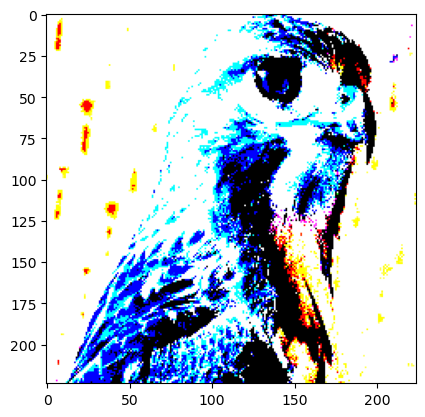

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15, 224, 224, 3)


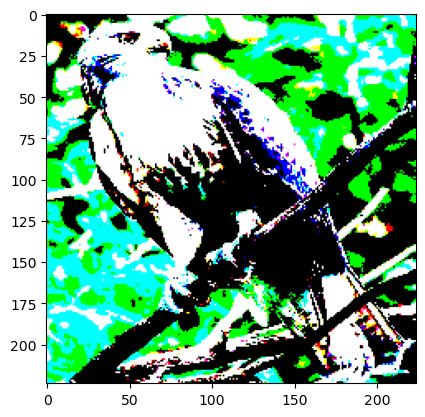

(15, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


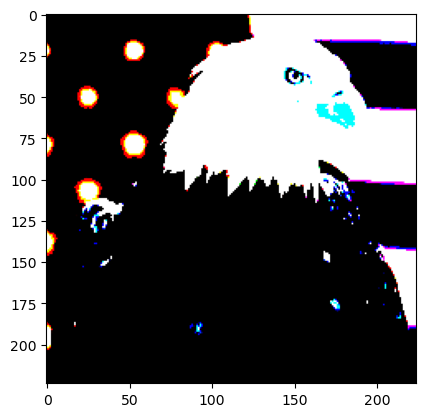

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15, 224, 224, 3)


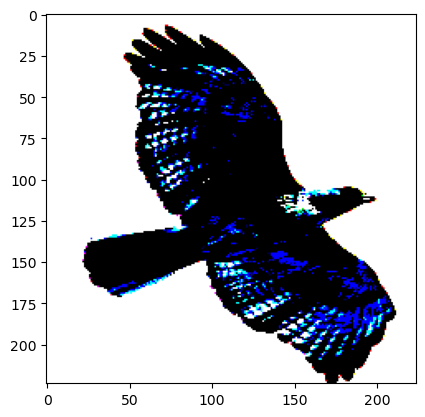

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15, 224, 224, 3)


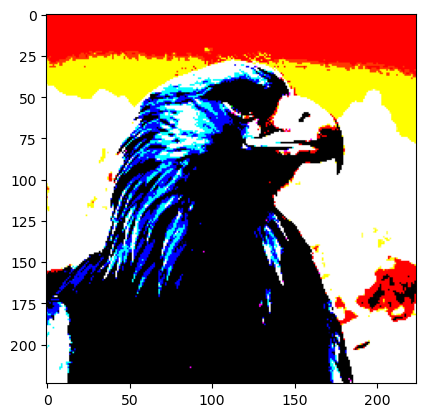

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15, 224, 224, 3)


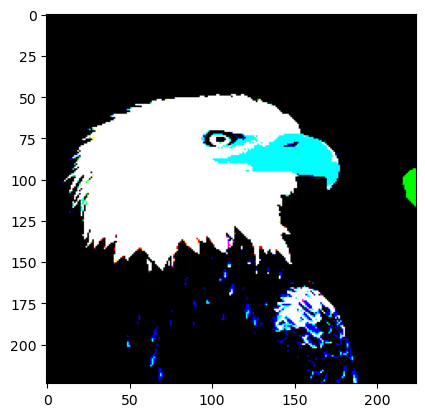

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15, 224, 224, 3)


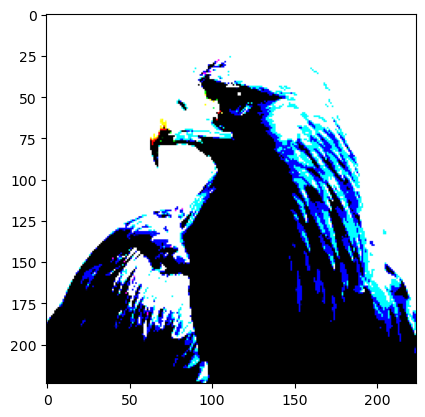

(15, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


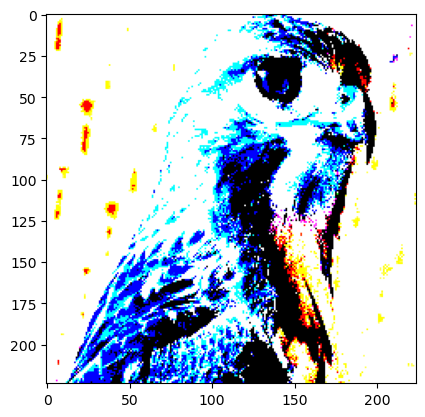

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15, 224, 224, 3)


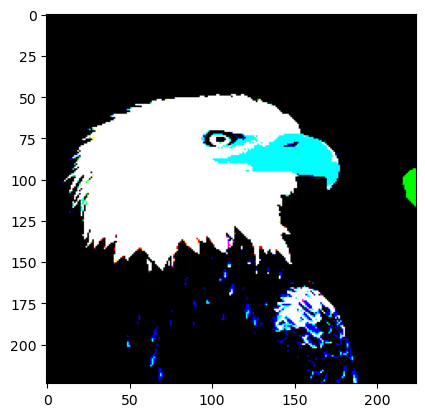

(15, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


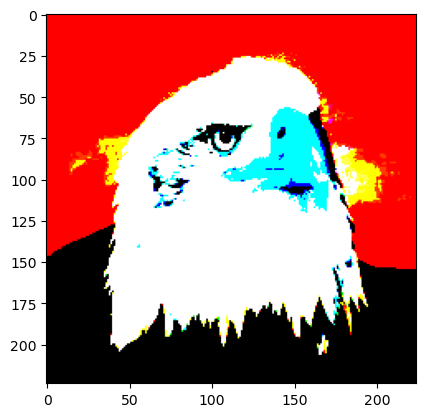

(15, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


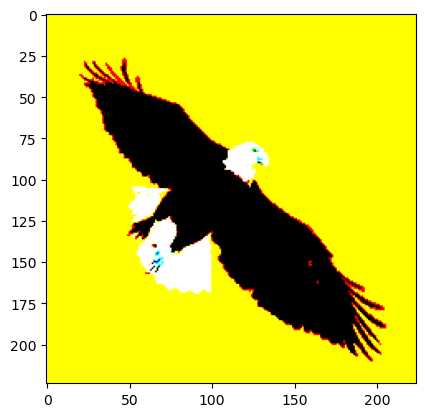

(15, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


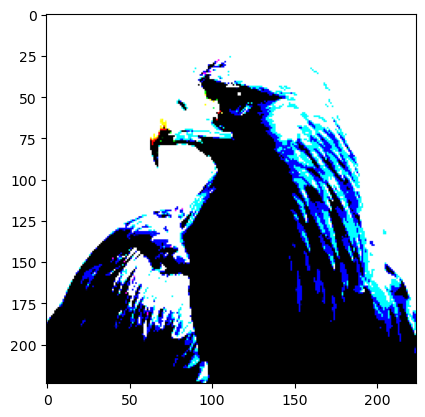

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15, 224, 224, 3)


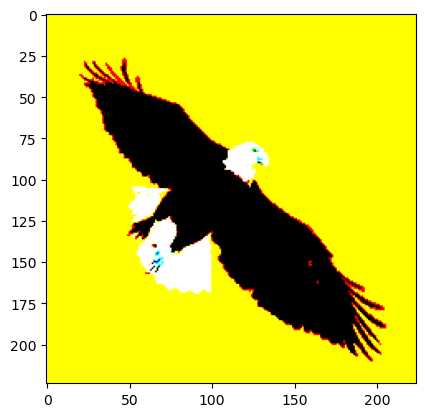

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(15, 224, 224, 3)


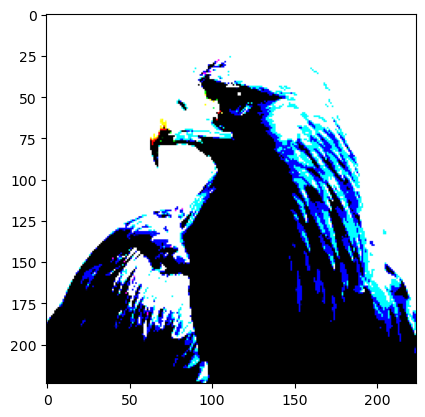

(15, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


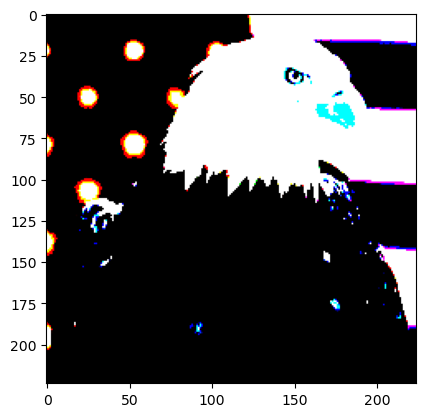

In [6]:
for _ in range(15):
    img, label = validation_generator.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

In [7]:
 #Training function
def bird_CNN(model_type, num_epochs=100, num_classes=3):
    
    input_shape = tuple(list(target_size)+[3]) #Input shape needed for model
    model_type = model_type #Model type passed into function
    
    # Model architecture   
    model = tf.keras.models.Sequential([
        model_type(input_shape=input_shape),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
     
    
    # Optimizer and compilation
    model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy',
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall()])
    
    
    total_sample=train_generator.n #Total sample count
    logpath = r'.\JennCapstone\logs' #Path to store training and validation event logs
    tensorboard = create_tensorboard_callback(logpath) #Creating Tensorboard object
    early_stopping = create_early_stopping_callback() #Early stoppping, 2 seems to be ideal
    
    #Fitting the model
    model.fit(
        train_generator, #Preprocessed training images
        validation_data=validation_generator, #Preprocessed validation images
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=num_epochs, 
        callbacks = [tensorboard, early_stopping])
    
    #Retruns a trained CNN model
    return model

In [8]:
#Function to create Tensboard callback object
def create_tensorboard_callback(path:r'.\JennCapstone\logs'):
    
    logdir = os.path.join(path, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
    
    return callback

In [8]:
#Function to create early stopping
def create_early_stopping_callback():
    
    callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
    
    return callback

In [9]:
#Function to save trained model
def save_model(model, suffix=""):
   
    model_path = "./models/" + suffix + ".h5"
    model.save(model_path)
    
    return model_path

In [122]:
#MobileNetV3 Model

model_type = tf.keras.applications.MobileNetV3Small

mn_model=bird_CNN(model_type)

Epoch 1/10
16/16 [==============================] - 42s 2s/step - loss: 1.0575 - accuracy: 0.5569 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.9878 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 28s 2s/step - loss: 0.9337 - accuracy: 0.7398 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.8439 - val_accuracy: 0.9333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 29s 2s/step - loss: 0.8023 - accuracy: 0.9004 - precision: 0.9850 - recall: 0.2663 - val_loss: 0.7066 - val_accuracy: 0.9333 - val_precision: 1.0000 - val_recall: 0.6000
Epoch 4/10
16/16 [==============================] - 31s 2s/step - loss: 0.6649 - accuracy: 0.9207 - precision: 0.9341 - recall: 0.6626 - val_loss: 0.5444 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
16/16 [==============================] - 29s 2s/step - loss: 0.6028 -

In [123]:
save_model(mn_model, suffix="mn_model")

'./models/mn_model.h5'

In [19]:
keras.backend.clear_session()

In [9]:
#Load saved model
saved_mn_model = tf.keras.models.load_model('./models/mn_model.h5')

In [10]:
#Model metrics using testing images
mn_metrics = saved_mn_model.evaluate(test_generator)
print("[INFO] accuracy: {:.2f}%".format(mn_metrics[1] * 100))
print("[INFO] Loss: ",mn_metrics[0])

1/1 [==============================] - 1s 1s/step - loss: 0.5177 - accuracy: 0.8667 - precision: 0.8667 - recall: 0.8667
[INFO] accuracy: 86.67%
[INFO] Loss:  0.5177342295646667


In [12]:
%load_ext tensorboard

In [10]:
#Directory with testing Bald Eagle pictures
baldeagle_test_dir = os.path.join(bird_test_directory + '\BALD EAGLE')
#File names
test_baldeagle_names = os.listdir(baldeagle_test_dir)

#Directory with testing Golden Eagle pictures
goldeneagle_test_dir = os.path.join(bird_test_directory + '\GOLDEN EAGLE')
#File names
test_goldeneagle_names = os.listdir(goldeneagle_test_dir)

#Directory with testing Red Tailed Hawk pictures
redtailedhawk_test_dir = os.path.join(bird_test_directory + '\RED TAILED HAWK')
#File names
test_redtailedhawk_names = os.listdir(redtailedhawk_test_dir)

1/1 [==============================] - 1s 1s/step


array([[0.7876019 , 0.11684901, 0.09554916]], dtype=float32)

Bird Prediction is:
BALD EAGLE


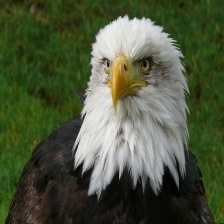



1/1 [==============================] - 0s 43ms/step


array([[0.6294872 , 0.17402907, 0.1964838 ]], dtype=float32)

Bird Prediction is:
BALD EAGLE


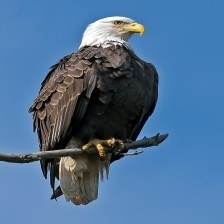



1/1 [==============================] - 0s 38ms/step


array([[0.7876021 , 0.11684885, 0.095549  ]], dtype=float32)

Bird Prediction is:
BALD EAGLE


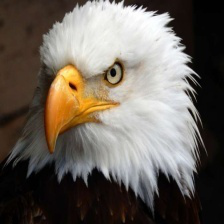



1/1 [==============================] - 0s 40ms/step


array([[0.78760225, 0.11684879, 0.09554896]], dtype=float32)

Bird Prediction is:
BALD EAGLE


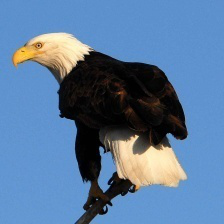



1/1 [==============================] - 0s 33ms/step


array([[0.78760225, 0.11684879, 0.09554896]], dtype=float32)

Bird Prediction is:
BALD EAGLE


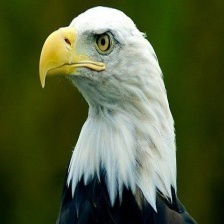

In [15]:
#Predicting Bald Eagle test images from dataset

#Index for iterating over images
bpic_index = 0

bpic_index += 5
next_baldeagle_pic = [os.path.join(baldeagle_test_dir, fname) 
                for fname in test_baldeagle_names[bpic_index-5:bpic_index]]

#Predicting Bald Eagle pics
for i, img_path in enumerate(next_baldeagle_pic):
    img_be = keras.preprocessing.image.load_img(img_path, target_size= (224,224))
    np_img_be = np.expand_dims(img_be,axis=0)
    
    bird_result_be = saved_mn_model.predict(np_img_be)
    bird_pred_be = labels[np.argmax(bird_result_be)]
    
    display(bird_result_be)
    print('Bird Prediction is:')
    print(bird_pred_be)
    display(img_be)
    print()
    print()


1/1 [==============================] - 0s 31ms/step


array([[0.10708714, 0.6294482 , 0.2634647 ]], dtype=float32)

Bird Prediction is:
GOLDEN EAGLE


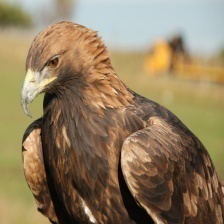



1/1 [==============================] - 0s 31ms/step


array([[0.78748804, 0.11691733, 0.09559456]], dtype=float32)

Bird Prediction is:
BALD EAGLE


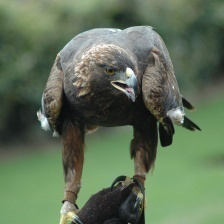



1/1 [==============================] - 0s 46ms/step


array([[0.10715742, 0.62644017, 0.2664024 ]], dtype=float32)

Bird Prediction is:
GOLDEN EAGLE


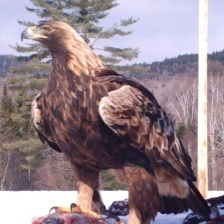



1/1 [==============================] - 0s 37ms/step


array([[0.08394755, 0.18040137, 0.7356511 ]], dtype=float32)

Bird Prediction is:
RED TAILED HAWK


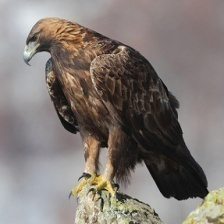



1/1 [==============================] - 0s 32ms/step


array([[0.10708714, 0.6294482 , 0.2634647 ]], dtype=float32)

Bird Prediction is:
GOLDEN EAGLE


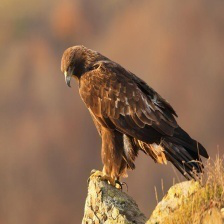

In [16]:
#Predicting Golden Eagle test images from dataset

#Index for iterating over images
gpic_index = 0

gpic_index += 5
next_goldeneagle_pic = [os.path.join(goldeneagle_test_dir, fname) 
                for fname in test_goldeneagle_names[gpic_index-5:gpic_index]]

#Predicting Golden Eagle pics
for i, img_path in enumerate(next_goldeneagle_pic):
    img_ge = keras.preprocessing.image.load_img(img_path, target_size= (224,224))
    np_img_ge = np.expand_dims(img_ge,axis=0)
    
    bird_result_ge = saved_mn_model.predict(np_img_ge)
    bird_pred_ge = labels[np.argmax(bird_result_ge)]
    
    display(bird_result_ge)
    print('Bird Prediction is:')
    print(bird_pred_ge)
    display(img_ge)
    print()
    print()


1/1 [==============================] - 0s 31ms/step


array([[0.07492055, 0.13497522, 0.79010427]], dtype=float32)

Bird Prediction is:
RED TAILED HAWK


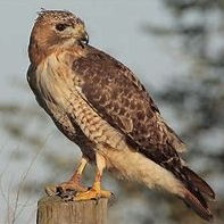



1/1 [==============================] - 0s 31ms/step


array([[0.07492055, 0.13497522, 0.79010427]], dtype=float32)

Bird Prediction is:
RED TAILED HAWK


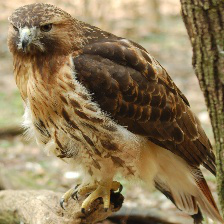



1/1 [==============================] - 0s 41ms/step


array([[0.07492055, 0.13497522, 0.79010427]], dtype=float32)

Bird Prediction is:
RED TAILED HAWK


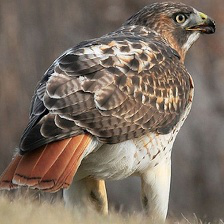



1/1 [==============================] - 0s 43ms/step


array([[0.07539003, 0.13714488, 0.78746516]], dtype=float32)

Bird Prediction is:
RED TAILED HAWK


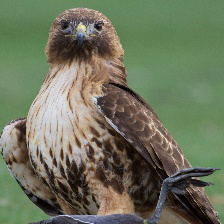



1/1 [==============================] - 0s 51ms/step


array([[0.07492055, 0.13497522, 0.79010427]], dtype=float32)

Bird Prediction is:
RED TAILED HAWK


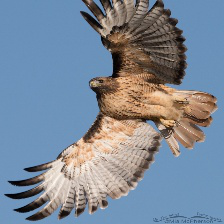

In [35]:
#Predicting Red Tailed Hawk test images from dataset

#Index for iterating over images
rpic_index = 0

rpic_index += 5
next_redtailedhawk_pic = [os.path.join(redtailedhawk_test_dir, fname) 
                for fname in test_redtailedhawk_names[rpic_index-5:rpic_index]]

#Predicting Red Tailed Hawk pics
for i, img_path in enumerate(next_redtailedhawk_pic):
    img_rth = keras.preprocessing.image.load_img(img_path, target_size= (224,224))
    np_img_rth = np.expand_dims(img_rth,axis=0)
    
    bird_result_rth = saved_mn_model.predict(np_img_rth)
    bird_pred_rth = labels[np.argmax(bird_result_rth)]
    
    display(bird_result_rth)
    print('Bird Prediction is:')
    print(bird_pred_rth)
    display(img_rth)
    print()
    print()

1/1 [==============================] - 1s 1s/step


array([[0.10708697, 0.6293115 , 0.2636015 ]], dtype=float32)

Bird Prediction is:
GOLDEN EAGLE


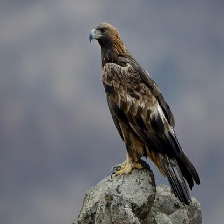

In [14]:
#Testing model on non dataset image

#Image path
user_image_path = os.path.join(r'C:\Users\jennr\OneDrive\WGU Classes\Capstone\user_images\golden.JPG')

#Predicting User images pic
user_image = keras.preprocessing.image.load_img(user_image_path, target_size= (224,224))
user_image_np = np.expand_dims(user_image,axis=0)
    
bird_result_user = saved_mn_model.predict(user_image_np)
bird_pred_user = labels[np.argmax(bird_result_user)]
    
display(bird_result_user)
print('Bird Prediction is:')
print(bird_pred_user)
display(user_image)